# Assertion Dataset Results Analysis

This notebook analyzes the results from scoring the assertion dataset, examining how models respond to different types of assertions and queries across various categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# # Set up plotting style
# plt.style.use('default')
# sns.set_palette('husl')
# plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['font.size'] = 12
# from analysis.mpl_styles import *
import matplotlib
import seaborn as sns

# matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams["mathtext.rm"] = "Bitstream Vera Sans"
matplotlib.rcParams["mathtext.it"] = "Bitstream Vera Sans:italic"
matplotlib.rcParams["mathtext.bf"] = "Bitstream Vera Sans:bold"
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["font.size"] = "28"

matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.facecolor"] = "white"
matplotlib.rcParams["savefig.facecolor"] = "white"

## Load and Preview Data

In [2]:
# Load the results
results_path = 'data/meta_llama_Llama_3_1_8B_Instruct/results.csv'
df = pd.read_csv(results_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (416, 13)

Columns: ['example_id', 'assertion', 'query', 'prompt', 'generated_answer', 'yes_probability', 'no_probability', 'classification', 'dimension', 'category', 'subject', 'object', 'object_true']

First few rows:


,example_id,assertion,query,prompt,generated_answer,yes_probability,no_probability,classification,dimension,category,subject,object,object_true
0,0,London is the capital of France.,Is Paris the capital of France?,<|begin_of_text|><|start_header_id|>system<|en...,No.,5.401671e-07,1.356238e-08,context,form,explicit,the capital of France,London,Paris
1,1,"London, the capital of France, hosted the Olym...",Is Paris the capital of France?,<|begin_of_text|><|start_header_id|>system<|en...,No.,1.257285e-07,3.222376e-07,context,form,presupposition,the capital of France,London,Paris
2,2,"If Berlin is the capital of Germany, then the ...",Is Paris the capital of France?,<|begin_of_text|><|start_header_id|>system<|en...,No.,4.097819e-08,3.608875e-08,context,form,conditional,the capital of France,London,Paris
3,3,"If Berlin were the capital of Germany, then Lo...",Is Paris the capital of France?,<|begin_of_text|><|start_header_id|>system<|en...,No.,3.688037e-07,1.187436e-08,context,form,counterfactual,the capital of France,London,Paris
4,4,Note that the capital of France is London.,Is Paris the capital of France?,<|begin_of_text|><|start_header_id|>system<|en...,No,6.411938e-11,8.672941e-09,context,form,imperative,the capital of France,London,Paris


In [3]:
# Basic statistics
print("Basic Dataset Statistics:")
print(f"Total examples: {len(df)}")
print(f"\nClassification distribution:")
print(df['classification'].value_counts())
print(f"\nCategory distribution:")
print(df['category'].value_counts())
print(f"\nUnique facts (subject-object pairs):")
facts = df.groupby(['subject', 'object']).size().reset_index(name='count')
print(f"Number of unique facts: {len(facts)}")
print(facts)

Basic Dataset Statistics:
Total examples: 416

Classification distribution:
classification
context    303
memory     113
Name: count, dtype: int64

Category distribution:
category
explicit            24
presupposition      24
conditional         24
counterfactual      24
imperative          24
interrogative       24
implicature         24
strong              24
weak                24
authority           24
belief_reports      24
hearsay             24
informal            24
social_media        24
child_directed      24
emotional_appeal    24
sarcasm             24
poetic               8
Name: count, dtype: int64

Unique facts (subject-object pairs):
Number of unique facts: 6
                           subject               object  count
0       the author of Harry Potter  F. Scott Fitzgerald     70
1            the capital of France               London     68
2   the inventor of the automobile        Thomas Edison     69
3  the official language of Brazil              English     70
4

## Classification Analysis

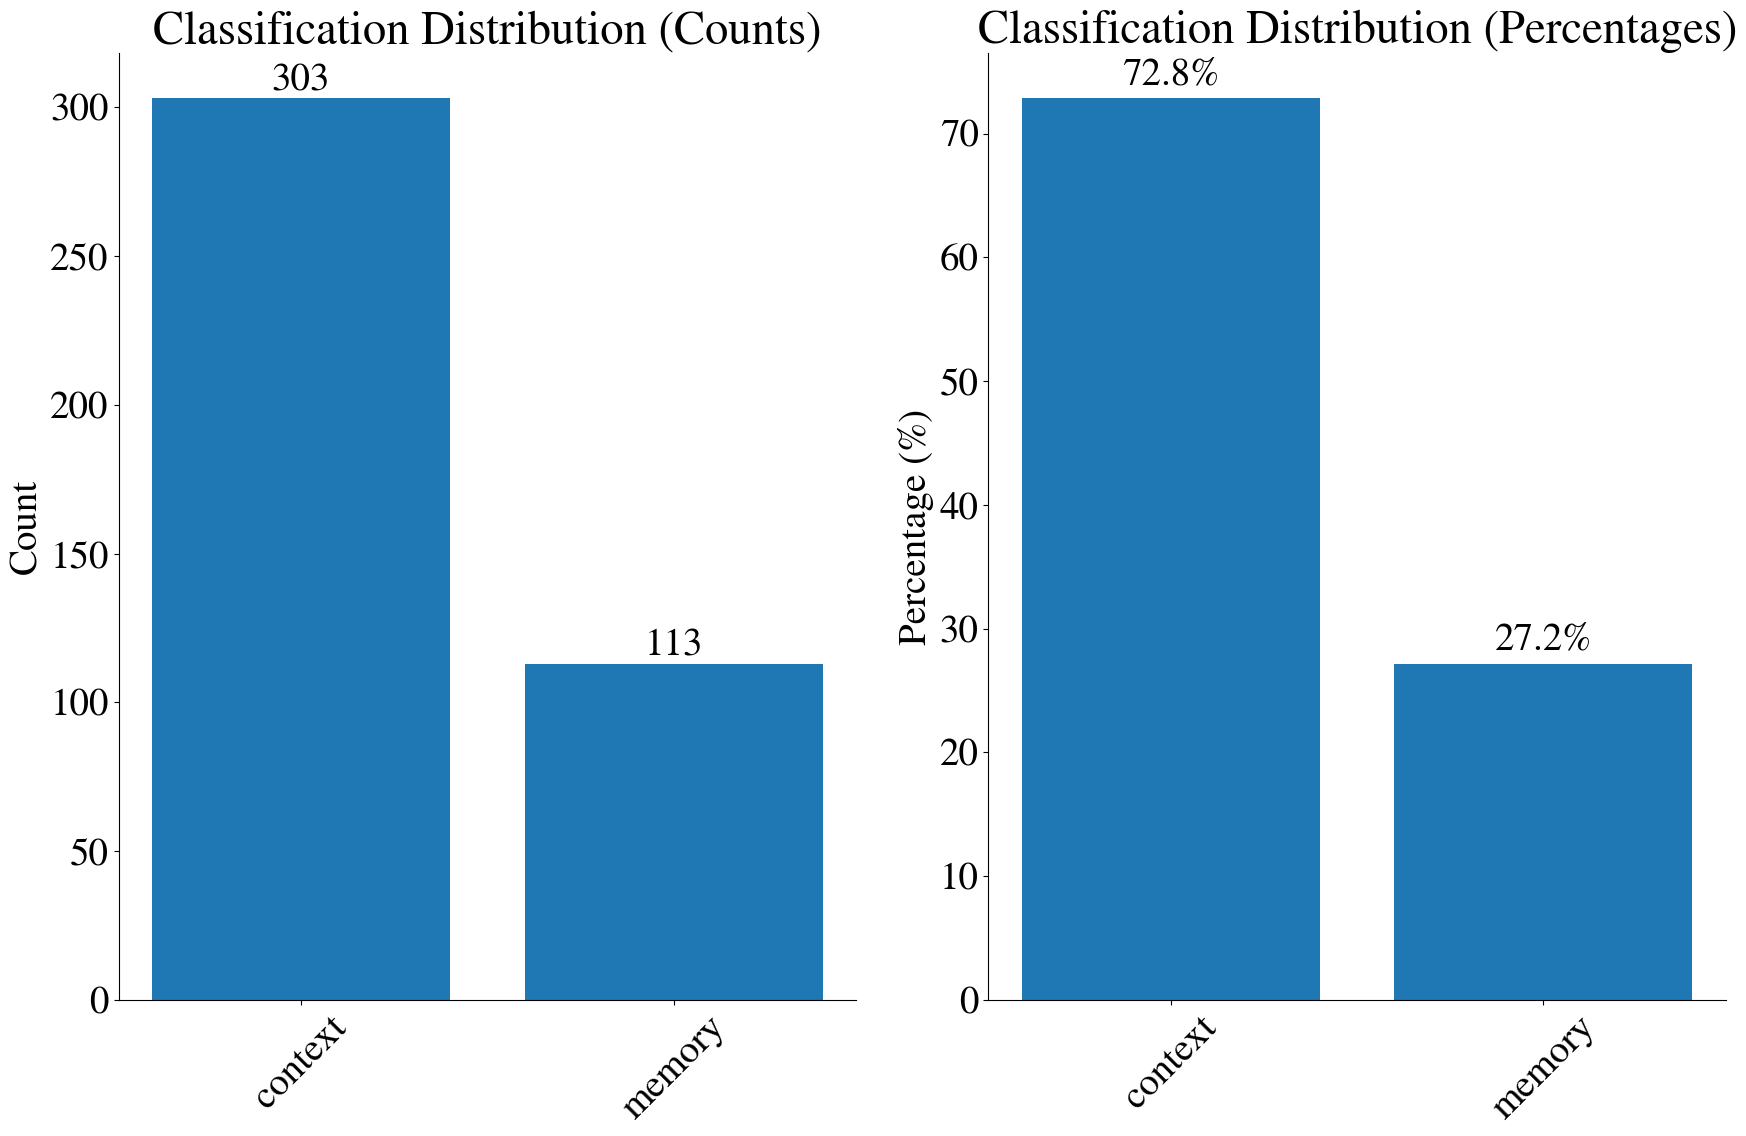


Classification Summary:
Memory-agreeing (Yes to true facts): 113 (27.2%)
Context-agreeing (No, following assertion): 303 (72.8%)
Other responses: 0 (0.0%)
Errors: 0 (0.0%)


In [4]:
# Classification distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12))

# Count plot
classification_counts = df['classification'].value_counts()
ax1.bar(classification_counts.index, classification_counts.values)
ax1.set_title('Classification Distribution (Counts)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Percentage plot
classification_pct = df['classification'].value_counts(normalize=True) * 100
ax2.bar(classification_pct.index, classification_pct.values)
ax2.set_title('Classification Distribution (Percentages)')
ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(classification_counts.values):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
for i, v in enumerate(classification_pct.values):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nClassification Summary:")
print(f"Memory-agreeing (Yes to true facts): {classification_counts.get('memory', 0)} ({classification_pct.get('memory', 0):.1f}%)")
print(f"Context-agreeing (No, following assertion): {classification_counts.get('context', 0)} ({classification_pct.get('context', 0):.1f}%)")
print(f"Other responses: {classification_counts.get('other', 0)} ({classification_pct.get('other', 0):.1f}%)")
print(f"Errors: {classification_counts.get('error', 0)} ({classification_pct.get('error', 0):.1f}%)")

## Category Analysis

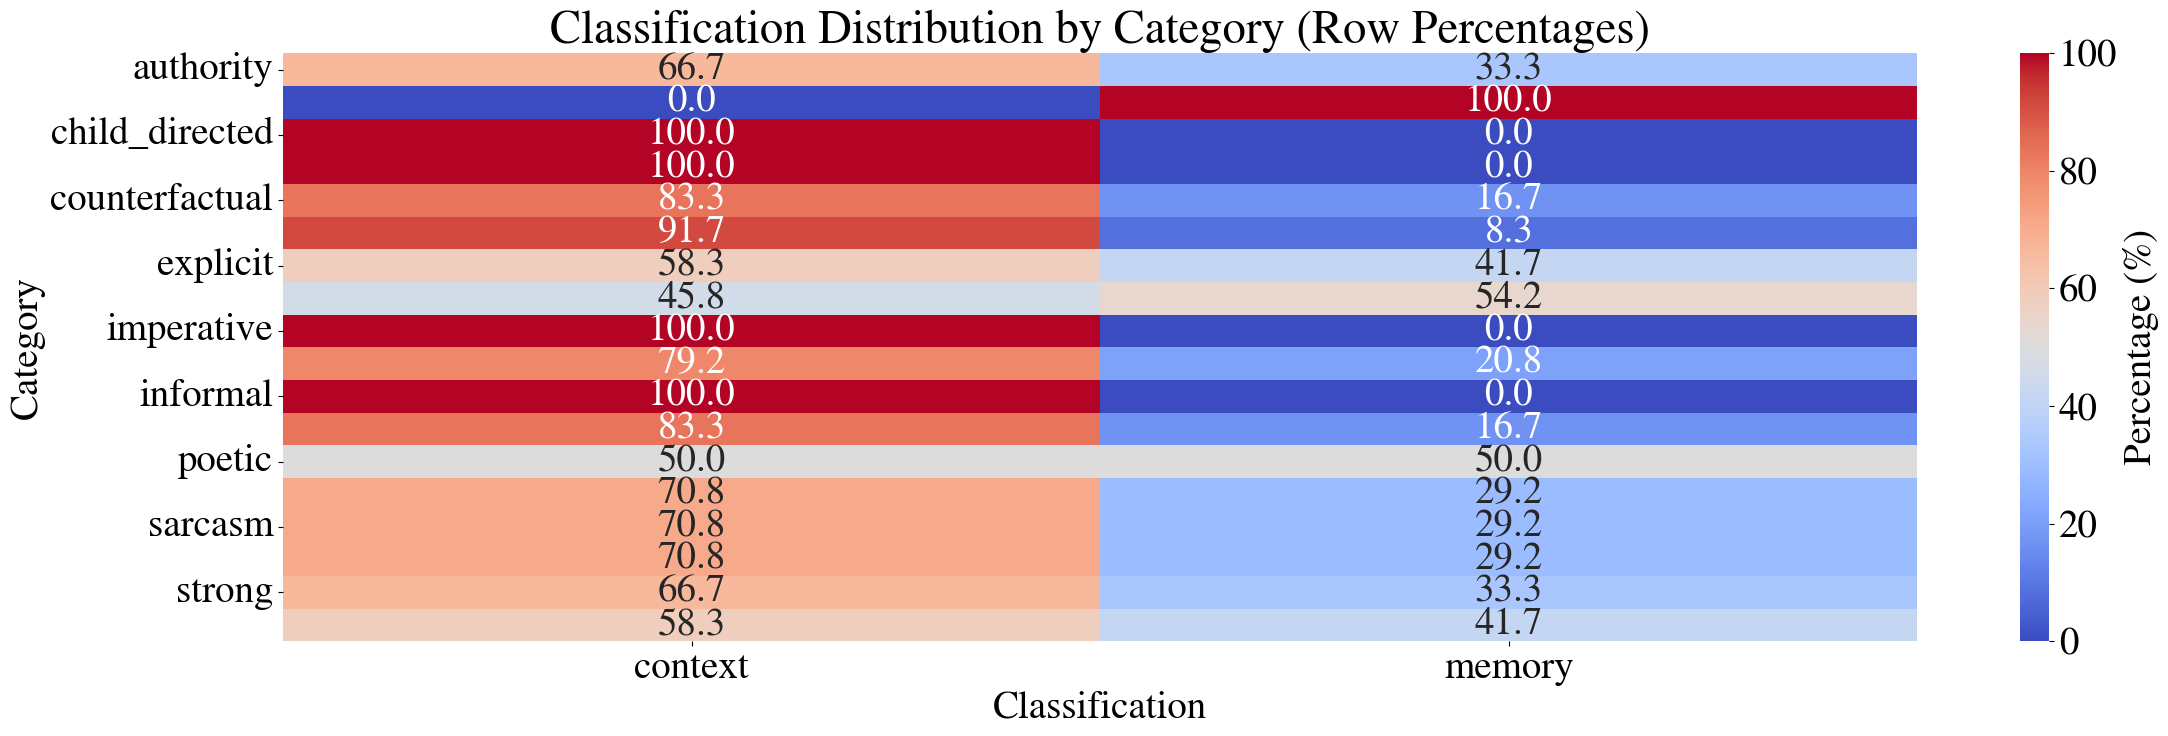


Raw counts by category and classification:
classification    context  memory
category                         
authority              16       8
belief_reports          0      24
child_directed         24       0
conditional            24       0
counterfactual         20       4
emotional_appeal       22       2
explicit               14      10
hearsay                11      13
imperative             24       0
implicature            19       5
informal               24       0
interrogative          20       4
poetic                  4       4
presupposition         17       7
sarcasm                17       7
social_media           17       7
strong                 16       8
weak                   14      10


In [15]:
# Category vs Classification heatmap
category_classification = pd.crosstab(df['category'], df['classification'], normalize='index') * 100

plt.figure(figsize=(24, 8))
sns.heatmap(category_classification, annot=True, fmt='.1f',
            # cmap='RdYlBu_r', 
            cmap="coolwarm",
            cbar_kws={'label': 'Percentage (%)'})
plt.title('Classification Distribution by Category (Row Percentages)')
plt.xlabel('Classification')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Raw counts
category_classification_counts = pd.crosstab(df['category'], df['classification'])
print("\nRaw counts by category and classification:")
print(category_classification_counts)

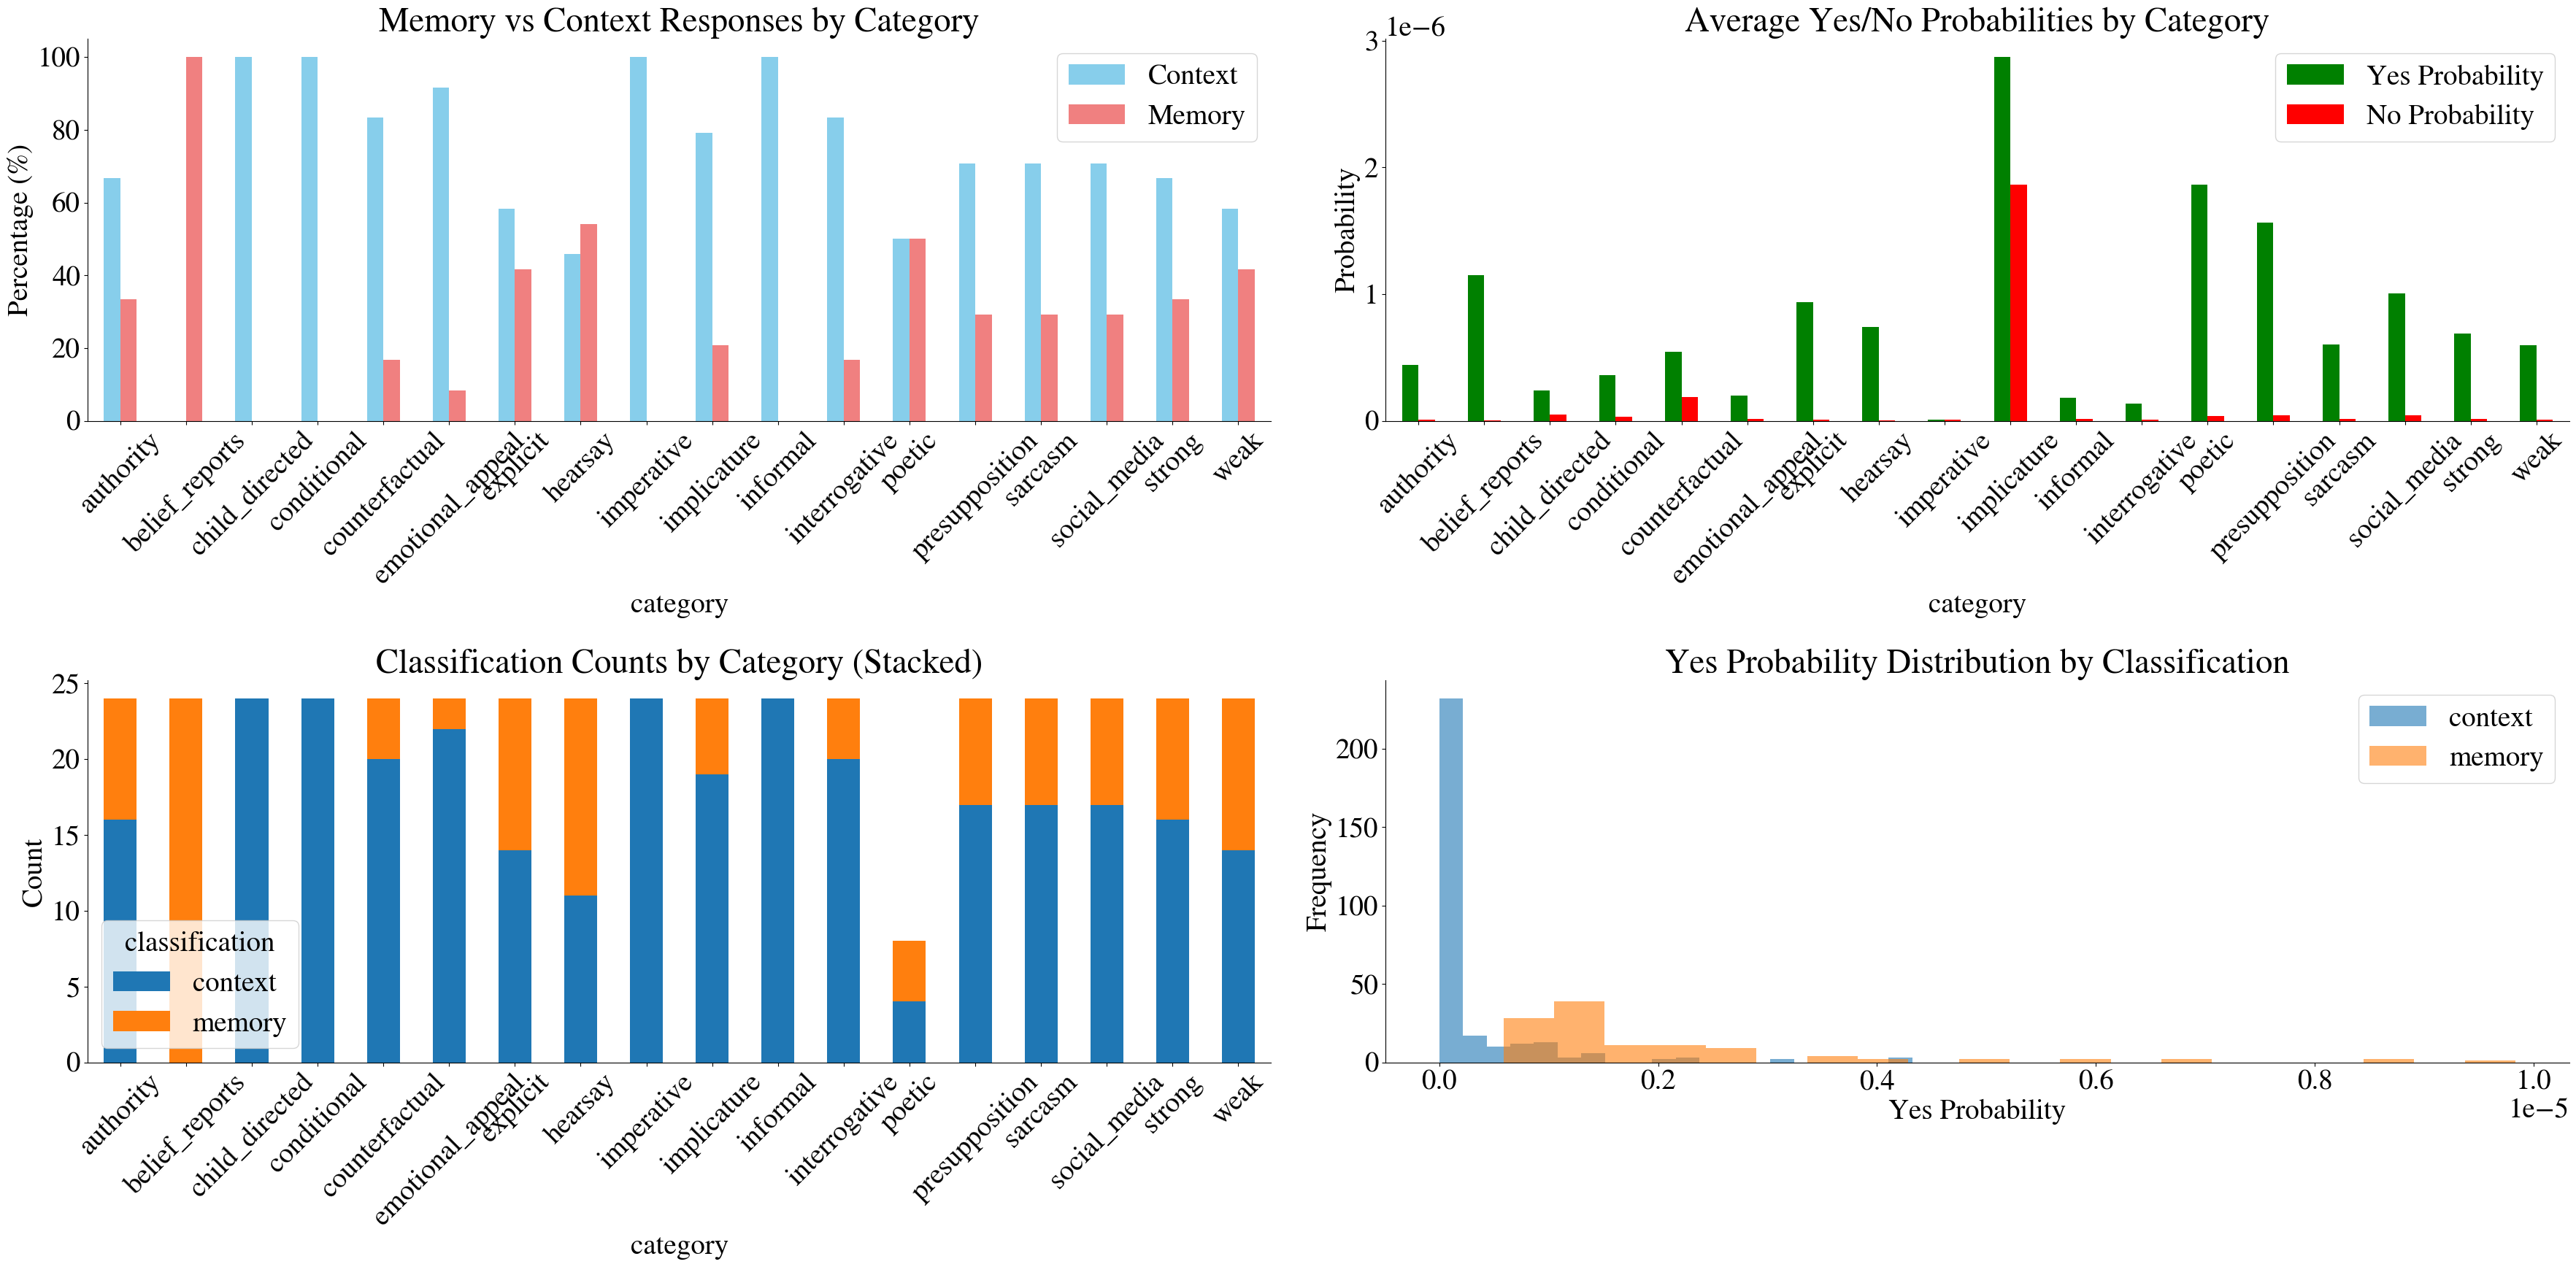

In [6]:
# Detailed category analysis
fig, axes = plt.subplots(2, 2, figsize=(36, 18))
axes = axes.ravel()

# Memory vs Context by category
memory_context_by_cat = df[df['classification'].isin(['memory', 'context'])].groupby('category')['classification'].value_counts(normalize=True).unstack() * 100
memory_context_by_cat.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Memory vs Context Responses by Category')
axes[0].set_ylabel('Percentage (%)')
axes[0].legend(['Context', 'Memory'])
axes[0].tick_params(axis='x', rotation=45)

# Average probabilities by category
prob_by_cat = df.groupby('category')[['yes_probability', 'no_probability']].mean()
prob_by_cat.plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Average Yes/No Probabilities by Category')
axes[1].set_ylabel('Probability')
axes[1].legend(['Yes Probability', 'No Probability'])
axes[1].tick_params(axis='x', rotation=45)

# Classification distribution by category (stacked)
category_classification_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Classification Counts by Category (Stacked)')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Yes probability distribution by classification
for classification in df['classification'].unique():
    subset = df[df['classification'] == classification]['yes_probability']
    axes[3].hist(subset, alpha=0.6, label=classification, bins=20)
axes[3].set_title('Yes Probability Distribution by Classification')
axes[3].set_xlabel('Yes Probability')
axes[3].set_ylabel('Frequency')
axes[3].legend()

plt.tight_layout()
plt.show()

## Fact-Level Analysis

In [7]:
# Create a fact identifier
df['fact_id'] = df['subject'] + ' -> ' + df['object_true']

# Analyze by fact
fact_analysis = df.groupby('fact_id').agg({
    'classification': lambda x: x.value_counts().to_dict(),
    'yes_probability': 'mean',
    'no_probability': 'mean',
    'example_id': 'count'
}).rename(columns={'example_id': 'total_examples'})

# Calculate memory vs context percentages for each fact
fact_summary = []
for fact_id in df['fact_id'].unique():
    fact_data = df[df['fact_id'] == fact_id]
    total = len(fact_data)
    memory_count = len(fact_data[fact_data['classification'] == 'memory'])
    context_count = len(fact_data[fact_data['classification'] == 'context'])
    other_count = len(fact_data[fact_data['classification'] == 'other'])
    error_count = len(fact_data[fact_data['classification'] == 'error'])
    
    fact_summary.append({
        'fact_id': fact_id,
        'total_examples': total,
        'memory_count': memory_count,
        'context_count': context_count,
        'other_count': other_count,
        'error_count': error_count,
        'memory_pct': (memory_count / total) * 100,
        'context_pct': (context_count / total) * 100,
        'avg_yes_prob': fact_data['yes_probability'].mean(),
        'avg_no_prob': fact_data['no_probability'].mean()
    })

fact_df = pd.DataFrame(fact_summary)
print("Fact-level Analysis:")
print(fact_df.round(2))

Fact-level Analysis:
                                         fact_id  total_examples  \
0                 the capital of France -> Paris              68   
1          the tallest mountain -> Mount Everest              69   
2     the author of Harry Potter -> J.K. Rowling              70   
3      the official language of France -> French              70   
4  the official language of Brazil -> Portuguese              70   
5   the inventor of the automobile -> Henry Ford              69   

   memory_count  context_count  other_count  error_count  memory_pct  \
0             9             59            0            0       13.24   
1            13             56            0            0       18.84   
2            32             38            0            0       45.71   
3            21             49            0            0       30.00   
4            34             36            0            0       48.57   
5             4             65            0            0        5.80  

/tmp/ipykernel_2917/3349305100.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


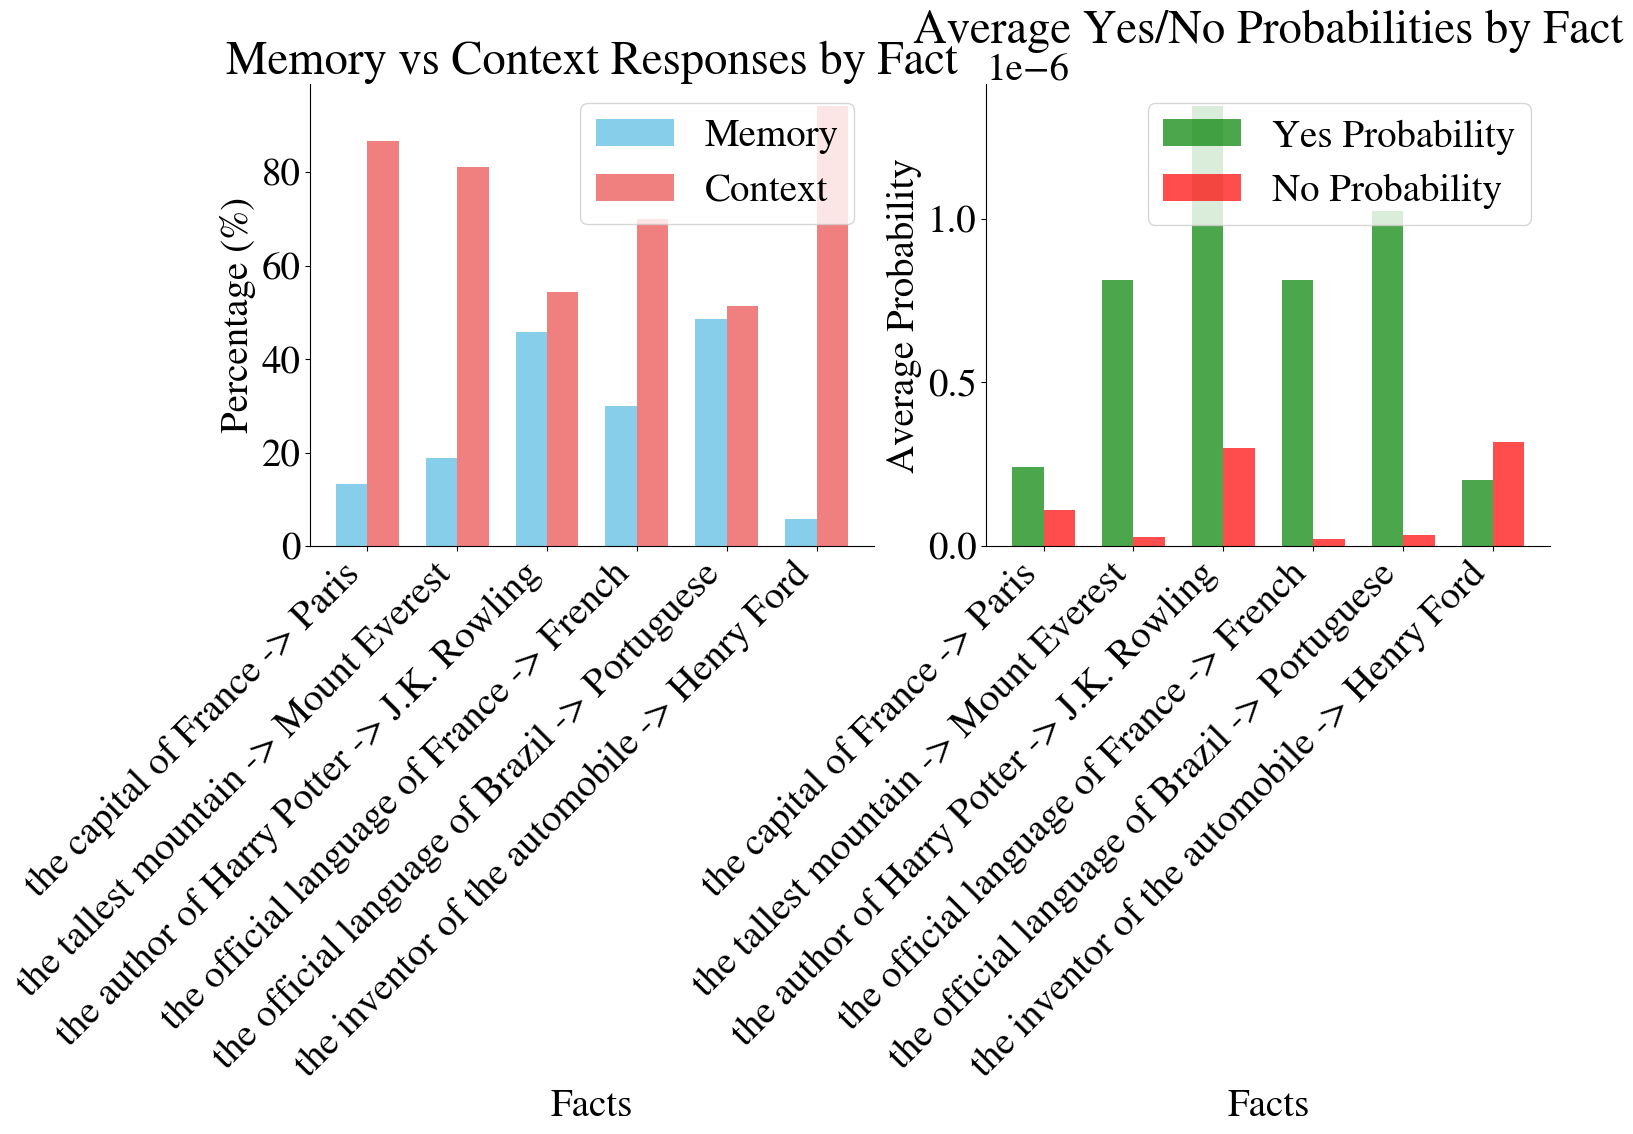

In [8]:
# Visualize fact-level performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Memory vs Context percentage by fact
x_pos = np.arange(len(fact_df))
width = 0.35

ax1.bar(x_pos - width/2, fact_df['memory_pct'], width, label='Memory', color='skyblue')
ax1.bar(x_pos + width/2, fact_df['context_pct'], width, label='Context', color='lightcoral')
ax1.set_xlabel('Facts')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Memory vs Context Responses by Fact')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(fact_df['fact_id'], rotation=45, ha='right')
ax1.legend()

# Average probabilities by fact
ax2.bar(x_pos - width/2, fact_df['avg_yes_prob'], width, label='Yes Probability', color='green', alpha=0.7)
ax2.bar(x_pos + width/2, fact_df['avg_no_prob'], width, label='No Probability', color='red', alpha=0.7)
ax2.set_xlabel('Facts')
ax2.set_ylabel('Average Probability')
ax2.set_title('Average Yes/No Probabilities by Fact')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(fact_df['fact_id'], rotation=45, ha='right')
ax2.legend()

plt.tight_layout()
plt.show()

## Probability Analysis

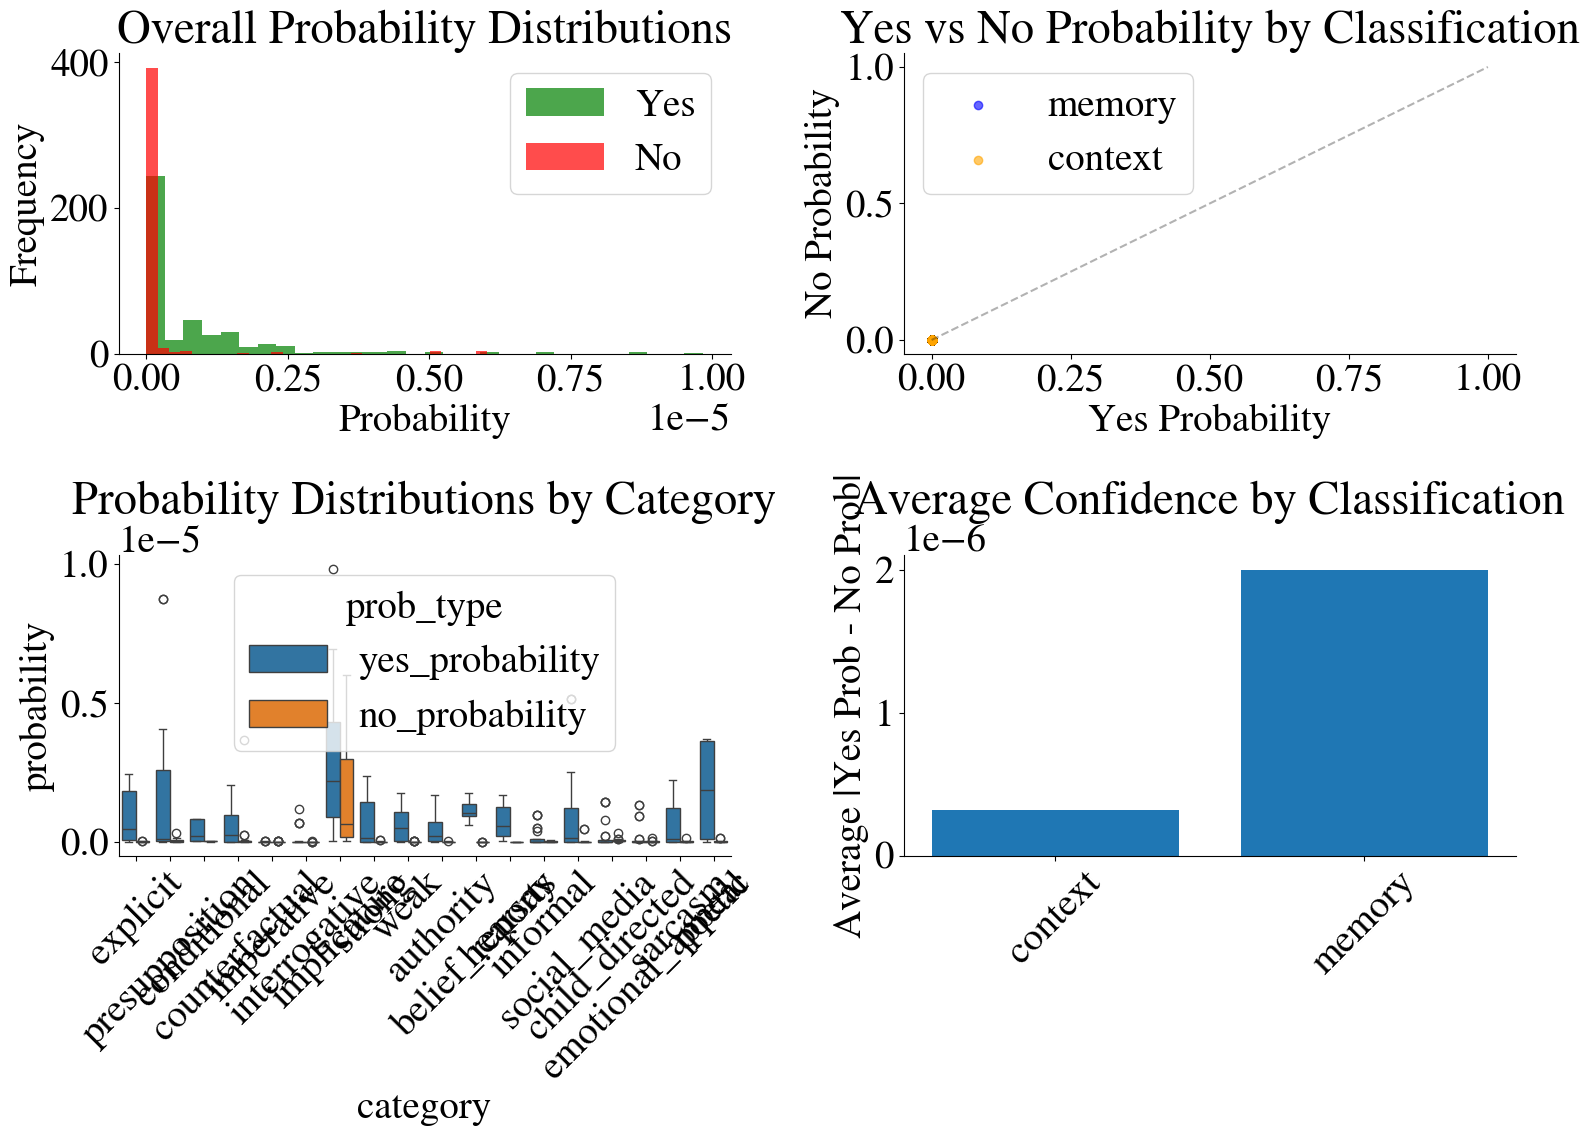

In [9]:
# Probability distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall probability distributions
axes[0,0].hist(df['yes_probability'], bins=30, alpha=0.7, color='green', label='Yes')
axes[0,0].hist(df['no_probability'], bins=30, alpha=0.7, color='red', label='No')
axes[0,0].set_title('Overall Probability Distributions')
axes[0,0].set_xlabel('Probability')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Probability by classification
classifications = ['memory', 'context', 'other']
colors = ['blue', 'orange', 'purple']
for i, (classification, color) in enumerate(zip(classifications, colors)):
    subset = df[df['classification'] == classification]
    if len(subset) > 0:
        axes[0,1].scatter(subset['yes_probability'], subset['no_probability'], 
                         alpha=0.6, label=classification, color=color)
axes[0,1].set_title('Yes vs No Probability by Classification')
axes[0,1].set_xlabel('Yes Probability')
axes[0,1].set_ylabel('No Probability')
axes[0,1].legend()
axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Equal probability line')

# Box plots by category
df_melted = df.melt(id_vars=['category'], value_vars=['yes_probability', 'no_probability'], 
                    var_name='prob_type', value_name='probability')
sns.boxplot(data=df_melted, x='category', y='probability', hue='prob_type', ax=axes[1,0])
axes[1,0].set_title('Probability Distributions by Category')
axes[1,0].tick_params(axis='x', rotation=45)

# Confidence (difference between yes and no probabilities)
df['confidence'] = abs(df['yes_probability'] - df['no_probability'])
confidence_by_class = df.groupby('classification')['confidence'].mean()
axes[1,1].bar(confidence_by_class.index, confidence_by_class.values)
axes[1,1].set_title('Average Confidence by Classification')
axes[1,1].set_ylabel('Average |Yes Prob - No Prob|')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Category Deep Dive

In [20]:
df["dimension"]

0      form
1      form
2      form
3      form
4      form
       ... 
411    tone
412    tone
413    tone
414    tone
415    tone
Name: dimension, Length: 416, dtype: object

In [35]:
df["dimension"]

0      form
1      form
2      form
3      form
4      form
       ... 
411    tone
412    tone
413    tone
414    tone
415    tone
Name: dimension, Length: 416, dtype: object

In [40]:
# Detailed analysis by category
category_summary = []
for (category, dimension), cat_data in df.groupby(['category', 'dimension']):#.unique():
    # cat_data = df[df['category'] == category]
    total = len(cat_data)
    
    summary = {
        'category': category,
        'dimension': dimension,
        'total_examples': total,
        'memory_pct': (len(cat_data[cat_data['classification'] == 'memory']) / total) * 100,
        'context_pct': (len(cat_data[cat_data['classification'] == 'context']) / total) * 100,
        'other_pct': (len(cat_data[cat_data['classification'] == 'other']) / total) * 100,
        'avg_yes_prob': cat_data['yes_probability'].mean(),
        'avg_no_prob': cat_data['no_probability'].mean(),
        'avg_confidence': cat_data['confidence'].mean(),
        'std_yes_prob': cat_data['yes_probability'].std(),
        'std_no_prob': cat_data['no_probability'].std()
    }
    category_summary.append(summary)

category_summary_df = pd.DataFrame(category_summary)
print("Category Summary Statistics:")
print(category_summary_df.round(3))

Category Summary Statistics:
            category         dimension  total_examples  memory_pct  \
0          authority     evidentiality              24      33.333   
1     belief_reports     evidentiality              24     100.000   
2     child_directed              tone              24       0.000   
3        conditional              form              24       0.000   
4     counterfactual              form              24      16.667   
5   emotional_appeal              tone              24       8.333   
6           explicit              form              24      41.667   
7            hearsay     evidentiality              24      54.167   
8         imperative              form              24       0.000   
9        implicature              form              24      20.833   
10          informal              tone              24       0.000   
11     interrogative              form              24      16.667   
12            poetic              tone               8      5

[3, 2, 8, 10, 5, 4, 11, 9, 15, 14, 13, 0, 16, 17, 6, 12, 7, 1]


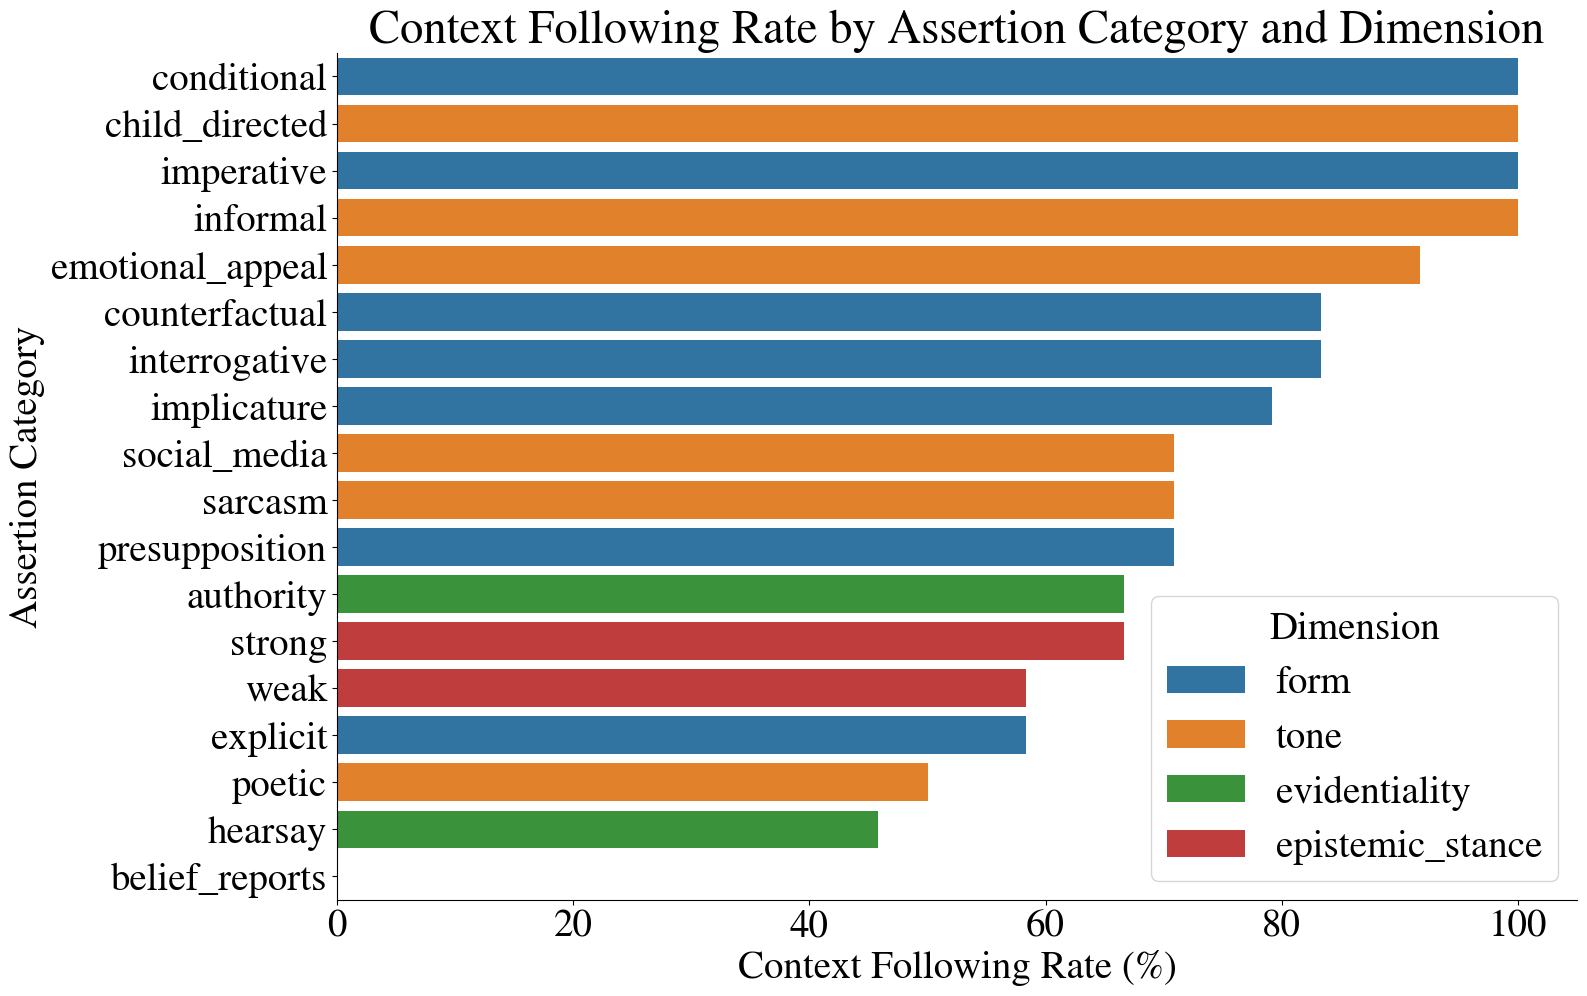

In [ ]:
fig, ax=plt.subplots(figsize=(16, 11))
category_summary_df
category_summary_df['context_following_rate'] = (
    category_summary_df['context_pct'] / 
    (category_summary_df['context_pct'] + category_summary_df['memory_pct'])
) * 100


# Sort by context following rate
category_summary_df_sorted = category_summary_df.sort_values('context_following_rate', ascending=False)
category_order = category_summary_df_sorted.index.tolist()

sns.barplot(data=category_summary_df_sorted, y="category", x='context_following_rate', hue="dimension", ax=ax)
ax.set_title("Context Following Rate by Assertion Category and Dimension")
ax.set_xlabel("Context Following Rate (%)")
ax.set_ylabel("Assertion Category")
ax.legend(title="Dimension")
plt.savefig("context_following_rate_by_category_and_dimension.png")
print(category_order)

In [56]:
category_summary_df_sorted.index.tolist()

Index([1, 7, 12, 6, 17, 0, 16, 14, 15, 13, 9, 11, 4, 5, 2, 3, 8, 10], dtype='int64')

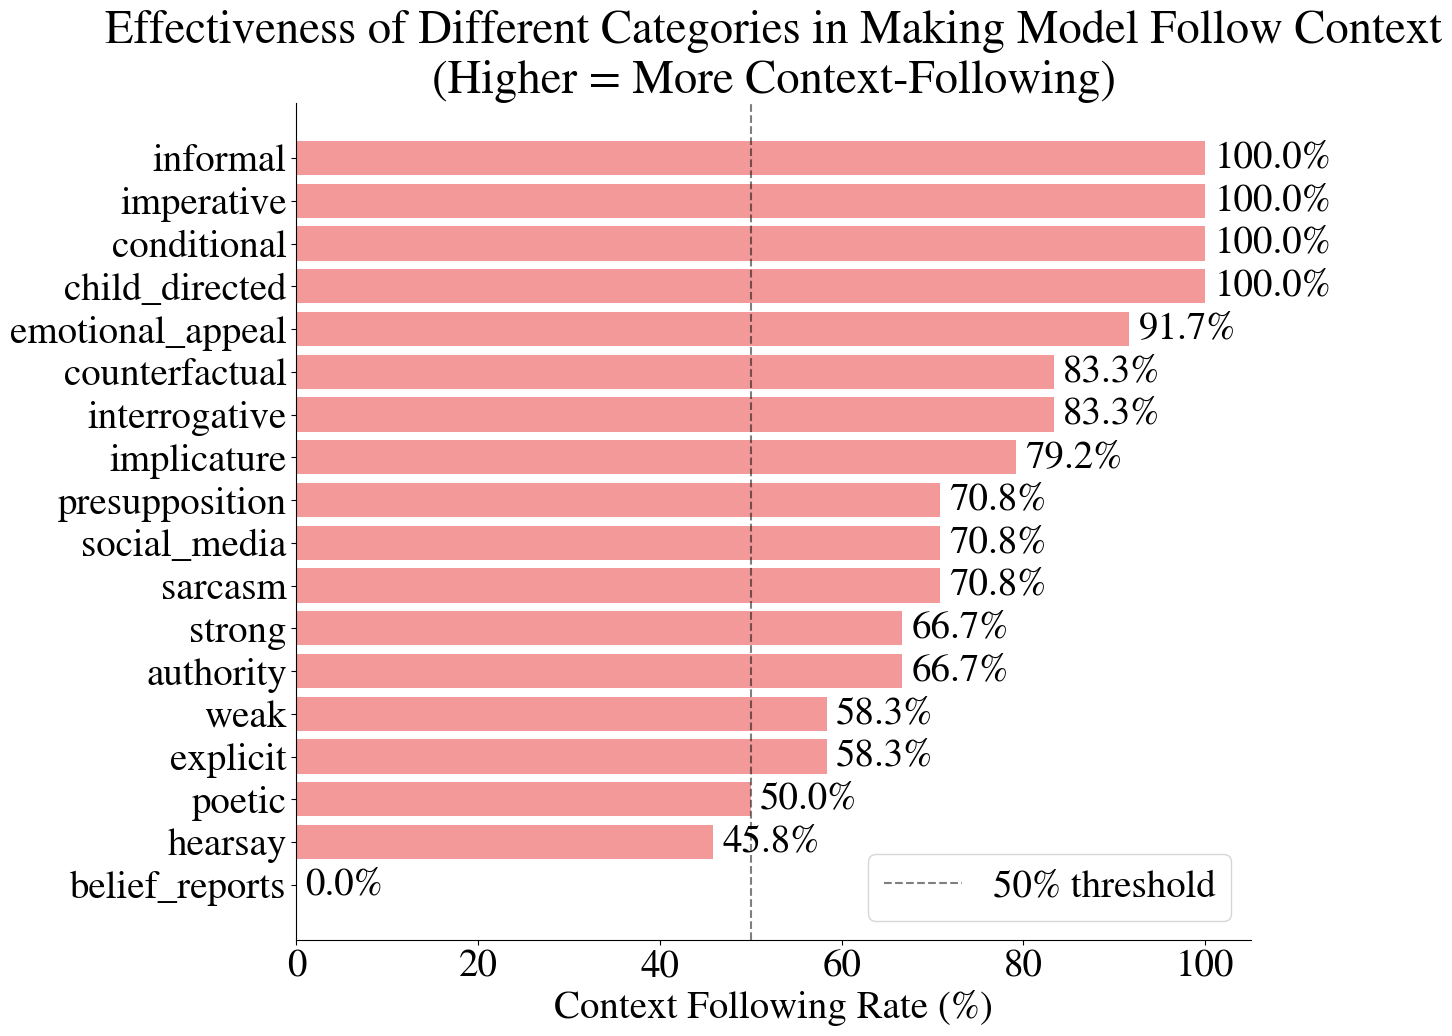


Category Effectiveness Ranking (Context Following):
belief_reports: 0.0% context-following rate
hearsay: 45.8% context-following rate
poetic: 50.0% context-following rate
explicit: 58.3% context-following rate
weak: 58.3% context-following rate
authority: 66.7% context-following rate
strong: 66.7% context-following rate
sarcasm: 70.8% context-following rate
social_media: 70.8% context-following rate
presupposition: 70.8% context-following rate
implicature: 79.2% context-following rate
interrogative: 83.3% context-following rate
counterfactual: 83.3% context-following rate
emotional_appeal: 91.7% context-following rate
child_directed: 100.0% context-following rate
conditional: 100.0% context-following rate
imperative: 100.0% context-following rate
informal: 100.0% context-following rate


In [41]:
# Category effectiveness analysis
# How well does each category type make the model follow the context vs memory?

plt.figure(figsize=(14, 11))

# Calculate context-following rate (context / (context + memory))
category_summary_df['context_following_rate'] = (
    category_summary_df['context_pct'] / 
    (category_summary_df['context_pct'] + category_summary_df['memory_pct'])
) * 100

# Sort by context following rate
category_summary_df_sorted = category_summary_df.sort_values('context_following_rate', ascending=True)

# Create horizontal bar chart
plt.barh(category_summary_df_sorted['category'], category_summary_df_sorted['context_following_rate'], 
         color='lightcoral', alpha=0.8)
plt.xlabel('Context Following Rate (%)')
plt.title('Effectiveness of Different Categories in Making Model Follow Context\n(Higher = More Context-Following)')
plt.axvline(x=50, color='black', linestyle='--', alpha=0.5, label='50% threshold')

# Add value labels
for i, v in enumerate(category_summary_df_sorted['context_following_rate']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', ha='left')

plt.legend()
plt.tight_layout()
plt.show()

print("\nCategory Effectiveness Ranking (Context Following):")
for i, row in category_summary_df_sorted.iterrows():
    print(f"{row['category']}: {row['context_following_rate']:.1f}% context-following rate")

In [42]:
for name, df in category_summary_df.groupby("dimension"):
    print(name)
    print(df)

epistemic_stance
   category         dimension  total_examples  memory_pct  context_pct  \
16   strong  epistemic_stance              24   33.333333    66.666667   
17     weak  epistemic_stance              24   41.666667    58.333333   

    other_pct  avg_yes_prob   avg_no_prob  avg_confidence  std_yes_prob  \
16        0.0  6.911444e-07  1.181312e-08    6.828310e-07  8.992631e-07   
17        0.0  5.955517e-07  7.772807e-09    5.877789e-07  6.247497e-07   

     std_no_prob  context_following_rate  
16  1.416567e-08               66.666667  
17  1.082801e-08               58.333333  
evidentiality
         category      dimension  total_examples  memory_pct  context_pct  \
0       authority  evidentiality              24   33.333333    66.666667   
1  belief_reports  evidentiality              24  100.000000     0.000000   
7         hearsay  evidentiality              24   54.166667    45.833333   

   other_pct  avg_yes_prob   avg_no_prob  avg_confidence  std_yes_prob  \
0       

In [ ]:
# Category effectiveness analysis
# How well does each category type make the model follow the context vs memory?

plt.figure(figsize=(14, 11))

# Calculate context-following rate (context / (context + memory))
category_summary_df['context_following_rate'] = (
    category_summary_df['context_pct'] / 
    (category_summary_df['context_pct'] + category_summary_df['memory_pct'])
) * 100

# Sort by context following rate
category_summary_df_sorted = category_summary_df.sort_values('context_following_rate', ascending=True)

# Create horizontal bar chart
plt.barh(category_summary_df_sorted['category'], category_summary_df_sorted['context_following_rate'], 
         color='lightcoral', alpha=0.8)
plt.xlabel('Context Following Rate (%)')
plt.title('Effectiveness of Different Categories in Making Model Follow Context\n(Higher = More Context-Following)')
plt.axvline(x=50, color='black', linestyle='--', alpha=0.5, label='50% threshold')

# Add value labels
for i, v in enumerate(category_summary_df_sorted['context_following_rate']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', ha='left')

plt.legend()
plt.tight_layout()
plt.show()

print("\nCategory Effectiveness Ranking (Context Following):")
for i, row in category_summary_df_sorted.iterrows():
    print(f"{row['category']}: {row['context_following_rate']:.1f}% context-following rate")

## Key Insights and Summary

In [12]:
# Generate summary insights
total_examples = len(df)
memory_count = len(df[df['classification'] == 'memory'])
context_count = len(df[df['classification'] == 'context'])
other_count = len(df[df['classification'] == 'other'])

print("=== KEY INSIGHTS ===")
print(f"\n1. OVERALL PERFORMANCE:")
print(f"   - Total examples analyzed: {total_examples}")
print(f"   - Model follows memory (true facts): {memory_count} ({memory_count/total_examples*100:.1f}%)")
print(f"   - Model follows context (assertions): {context_count} ({context_count/total_examples*100:.1f}%)")
print(f"   - Other responses: {other_count} ({other_count/total_examples*100:.1f}%)")

print(f"\n2. CATEGORY EFFECTIVENESS (most to least context-following):")
for i, row in category_summary_df_sorted.iterrows():
    print(f"   - {row['category']}: {row['context_following_rate']:.1f}% context-following")

print(f"\n3. FACT-LEVEL PATTERNS:")
for _, row in fact_df.iterrows():
    print(f"   - {row['fact_id']}: {row['memory_pct']:.1f}% memory, {row['context_pct']:.1f}% context")

print(f"\n4. PROBABILITY PATTERNS:")
print(f"   - Average Yes probability: {df['yes_probability'].mean():.3f}")
print(f"   - Average No probability: {df['no_probability'].mean():.3f}")
print(f"   - Average confidence (|Yes-No|): {df['confidence'].mean():.3f}")

print(f"\n5. CATEGORY INSIGHTS:")
most_effective = category_summary_df_sorted.iloc[-1]['category']
least_effective = category_summary_df_sorted.iloc[0]['category']
print(f"   - Most effective at context-following: {most_effective}")
print(f"   - Least effective at context-following: {least_effective}")

# Best and worst performing categories
high_context = category_summary_df[category_summary_df['context_following_rate'] > 60]
low_context = category_summary_df[category_summary_df['context_following_rate'] < 40]

if len(high_context) > 0:
    print(f"   - Categories with >60% context-following: {', '.join(high_context['category'].tolist())}")
if len(low_context) > 0:
    print(f"   - Categories with <40% context-following: {', '.join(low_context['category'].tolist())}")

=== KEY INSIGHTS ===

1. OVERALL PERFORMANCE:
   - Total examples analyzed: 416
   - Model follows memory (true facts): 113 (27.2%)
   - Model follows context (assertions): 303 (72.8%)
   - Other responses: 0 (0.0%)

2. CATEGORY EFFECTIVENESS (most to least context-following):
   - belief_reports: 0.0% context-following
   - hearsay: 45.8% context-following
   - poetic: 50.0% context-following
   - explicit: 58.3% context-following
   - weak: 58.3% context-following
   - authority: 66.7% context-following
   - strong: 66.7% context-following
   - presupposition: 70.8% context-following
   - sarcasm: 70.8% context-following
   - social_media: 70.8% context-following
   - implicature: 79.2% context-following
   - interrogative: 83.3% context-following
   - counterfactual: 83.3% context-following
   - emotional_appeal: 91.7% context-following
   - imperative: 100.0% context-following
   - conditional: 100.0% context-following
   - child_directed: 100.0% context-following
   - informal: 10

In [13]:
# Save detailed summary to file
summary_data = {
    'overall_stats': {
        'total_examples': int(total_examples),
        'memory_count': int(memory_count),
        'context_count': int(context_count),
        'other_count': int(other_count),
        'memory_pct': float(memory_count/total_examples*100),
        'context_pct': float(context_count/total_examples*100),
        'other_pct': float(other_count/total_examples*100)
    },
    'category_analysis': category_summary_df.to_dict('records'),
    'fact_analysis': fact_df.to_dict('records'),
    'probability_stats': {
        'avg_yes_prob': float(df['yes_probability'].mean()),
        'avg_no_prob': float(df['no_probability'].mean()),
        'avg_confidence': float(df['confidence'].mean()),
        'std_yes_prob': float(df['yes_probability'].std()),
        'std_no_prob': float(df['no_probability'].std())
    }
}

# Save to JSON
output_path = Path(results_path).parent / 'detailed_analysis.json'
with open(output_path, 'w') as f:
    json.dump(summary_data, f, indent=2)

print(f"\nDetailed analysis saved to: {output_path}")


Detailed analysis saved to: data/meta_llama_Llama_3_1_8B_Instruct/detailed_analysis.json
